# Linear Regression using PyTorch Built-ins

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [2]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


## Dataset and DataLoader

We'll create a **TensorDataset**, which allows access to rows from inputs and targets as tuples

Create **DataLoader** which splits the data into batches of a predefined size while training

In [3]:
from torch.utils.data import TensorDataset, DataLoader

In [4]:
# Define DataSet

ds = TensorDataset(inputs, targets)
ds[0:2]

(tensor([[73., 67., 43.],
         [91., 88., 64.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.]]))

In [5]:
# used in FOR loops

batch_size = 5
batch_data = DataLoader(ds, batch_size, shuffle=True)


In [6]:
for xb, yb in batch_data:
    print(xb)
    print(yb)
    break

tensor([[ 87., 134.,  58.],
        [ 73.,  67.,  43.],
        [102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [ 73.,  67.,  43.]])
tensor([[119., 133.],
        [ 56.,  70.],
        [ 22.,  37.],
        [ 56.,  70.],
        [ 56.,  70.]])


# Linear Model with PyTorch

In [7]:
import torch.nn as nn

In [8]:
# define a Model

reg_model = nn.Linear(3,2) # Weight Transpose = 3X2
print(reg_model.weight)
print(reg_model.bias)

Parameter containing:
tensor([[-0.2484, -0.1727,  0.2900],
        [ 0.5734,  0.1996, -0.3947]], requires_grad=True)
Parameter containing:
tensor([ 0.5251, -0.3270], requires_grad=True)


In [9]:
# Parameters Object

list(reg_model.parameters())

[Parameter containing:
 tensor([[-0.2484, -0.1727,  0.2900],
         [ 0.5734,  0.1996, -0.3947]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5251, -0.3270], requires_grad=True)]

In [10]:
# Predictions

prediction = reg_model(inputs)
prediction

tensor([[-16.7067,  37.9296],
        [-18.7135,  44.1532],
        [-27.4026,  53.4084],
        [-21.5072,  52.1353],
        [-12.8893,  30.7677],
        [-16.7067,  37.9296],
        [-18.7135,  44.1532],
        [-27.4026,  53.4084],
        [-21.5072,  52.1353],
        [-12.8893,  30.7677],
        [-16.7067,  37.9296],
        [-18.7135,  44.1532],
        [-27.4026,  53.4084],
        [-21.5072,  52.1353],
        [-12.8893,  30.7677]], grad_fn=<AddmmBackward>)

## Loss Function


In [11]:
import torch.nn.functional as F

In [12]:
loss_f = F.mse_loss(prediction, targets)
loss_f

tensor(7059.4902, grad_fn=<MseLossBackward>)

## Optimizer

In [13]:
# Define Optimizer

lr = 1e-5
parameterr = reg_model.parameters() # weight n biases
opt = torch.optim.SGD(parameterr, lr)
opt

SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Train the MODEL & Plot

In [14]:
def fit(n_epoch, model, optm, batch_data):
    loss_list = np.zeros(n_epoch)
    for epoch in range(n_epoch):
        # train with batches
        for batch_input, batch_target in batch_data:
            
            # Forward Pass
            # 1. Generate Predictions
            prediction = model(batch_input)
            
            # Backward Pass and optimization
            # 2. Calculate Loss
            loss = F.mse_loss(prediction, batch_target)
            
            # 3. Compute Gradient
            loss.backward()
            
            # 4. Update parameteres using gradients
            optm.step()
            
            # 5. Reset the gradient to zero
            optm.zero_grad()
            
            
            
        # print the loss for every 10th epoch
        if (epoch+1)%10 == 0:
            print('Epoch [{}/{}], Loss: {: .4f}' .format(epoch+1, n_epoch, loss.item()))
            
        plt.plot(epoch, loss.item(), '-x')
        

Epoch [10/100], Loss:  818.6578
Epoch [20/100], Loss:  517.5946
Epoch [30/100], Loss:  314.5335
Epoch [40/100], Loss:  194.8740
Epoch [50/100], Loss:  141.2063
Epoch [60/100], Loss:  108.7981
Epoch [70/100], Loss:  50.2252
Epoch [80/100], Loss:  78.2705
Epoch [90/100], Loss:  78.2831
Epoch [100/100], Loss:  50.0881


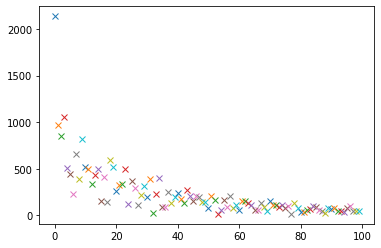

In [15]:
# Run the model

fit(100, reg_model, opt, batch_data)

In [16]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [17]:
# Generate predicitons to visualize the data
predictions = reg_model(inputs)
predictions

tensor([[ 58.1991,  72.3556],
        [ 82.7287,  95.8273],
        [115.8166, 141.0757],
        [ 26.5846,  48.2893],
        [ 99.7227, 104.0404],
        [ 58.1991,  72.3556],
        [ 82.7287,  95.8273],
        [115.8166, 141.0757],
        [ 26.5846,  48.2893],
        [ 99.7227, 104.0404],
        [ 58.1991,  72.3556],
        [ 82.7287,  95.8273],
        [115.8166, 141.0757],
        [ 26.5846,  48.2893],
        [ 99.7227, 104.0404]], grad_fn=<AddmmBackward>)